# Projeto - Visão Computacional 

<br>

#### Implementação do artigo [Predicting Biomechanical Risk Factors for Division - I Women’s Basketball Athletes](https://ieeexplore.ieee.org/document/10887636)
##### Feito por Lucas Paiva Ferruccio
---

#### • Instalar dependencias e configurar o ambiente (Rode os comandos no terminal)
##### • Criar o ambiente virtual e instala as dependências
* `conda env create -f environment.yml`
##### • Ativa o ambiente virtual
* `conda activate env_cv`
##### • Adiciona o kernel no ambiente do jupyter
* `python -m ipykernel install --user --name env_cv --display-name "Python (env_cv)"`
##### • Altere o interpreter python para o env_cv nas configurações do seu projeto.

#### • Imports

In [4]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

#### • Testes

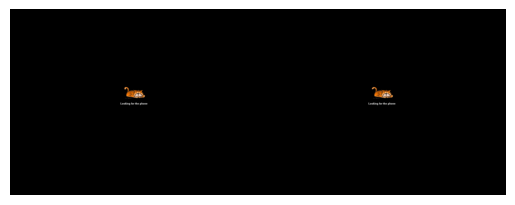

In [8]:
# Concatena dois frames
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
ret2, frame2 = cap.read()

cap.release()

img_dupla = cv2.hconcat([frame, frame2])

image = cv2.cvtColor(img_dupla, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(image)

In [ ]:
# Captura de video

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Pose Tracking (Pressione Q para sair)', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [2]:
!python --version

Python 3.10.18


In [5]:
# Configurando o mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

cap = cv2.VideoCapture(0)

"""

min_detection_confidence -> Define a porcentagem de confiança de detecção de uma pessoa

min_tracking_confidence -> Define a porcentagem de confiança de detecção dos pontos do corpo

"""
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # CONVERTE para RGB (Formato do MediaPipe)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Protecao dos dados e otimizacao
        image.flags.writeable = False
        
        # PROCESSAMENTO
        results = pose.process(image)
        
        image.flags.writeable = True
        image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # DESENHA os landmarks na imagem RGB
        mp_drawing.draw_landmarks(image_bgr, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        # Exibe o frame
        cv2.imshow('Pose Tracking (Pressione Q para sair)', image_bgr)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

C:\Users\Lucas Paiva\miniconda3\envs\env_cv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
